<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

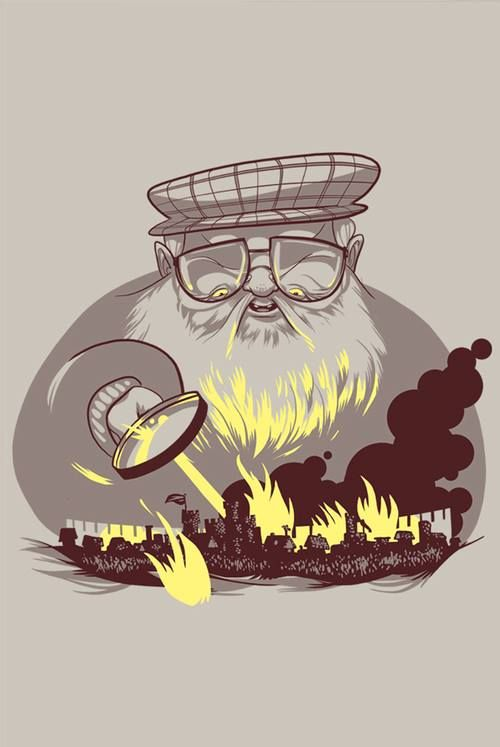

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **DateoFdeath**: дата смерти

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [777]:
!gdown 1ANEFC_GKeJm4GCx1Xd202gkAgqK2Bm4S # test dataset
!gdown 1oSX7B5YhS6vQseTsQZYryu44HxSq6ZWV # train dataset

Downloading...
From: https://drive.google.com/uc?id=1ANEFC_GKeJm4GCx1Xd202gkAgqK2Bm4S
To: /content/game_of_thrones_test.csv
100% 38.3k/38.3k [00:00<00:00, 50.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1oSX7B5YhS6vQseTsQZYryu44HxSq6ZWV
To: /content/game_of_thrones_train.csv
100% 141k/141k [00:00<00:00, 97.8MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [778]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Устанавливаем стили для pyplot
plt.style.use('ggplot')

# Убираем warning на SettingWithCopyWarning
pd.options.mode.chained_assignment = None

[Про ошибку прочтитать здесь](https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas)

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [779]:
df = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')
df_test = pd.read_csv('game_of_thrones_test.csv', index_col='S.No')

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

<BarContainer object of 26 artists>

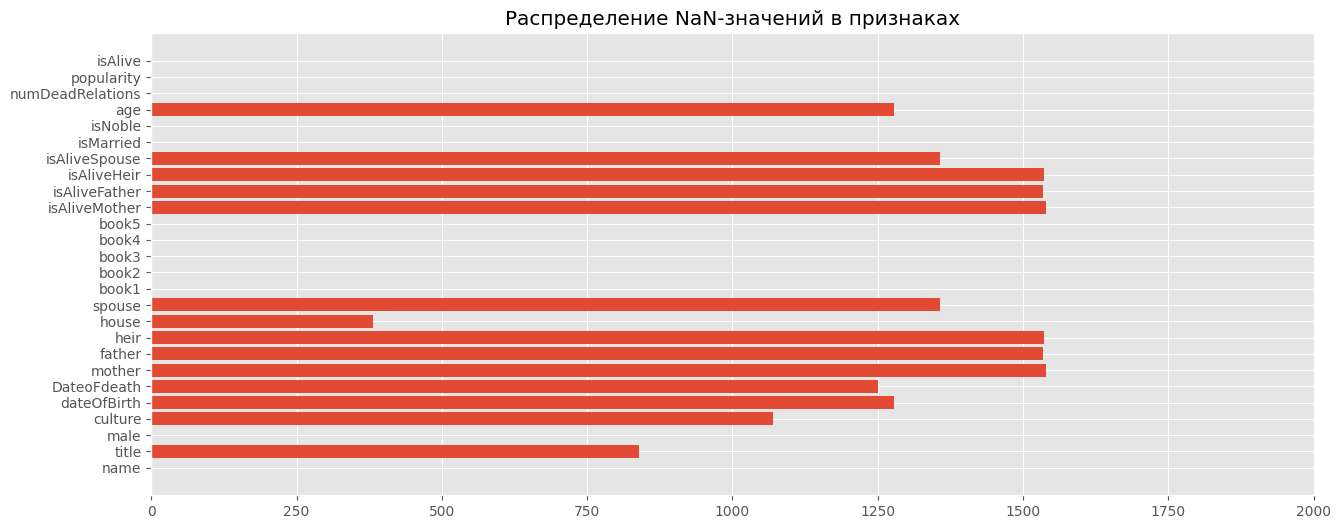

In [780]:
plt.figure(figsize=(15, 6))
plt.xlim(0, 2000)
plt.title('Распределение NaN-значений в признаках')
plt.barh(df.columns, df.isna().sum())

**Мысли автора:**

Как видно из графика в признаках: isAliveSpouse, isAliveHeir, isAliveFather, isAliveMother, spouse, heir, father, mother, dateOfBirth много NaN-значений, а так же данные признаки являются неинформативными по отношению к таргетному признаку (isAlive). В дальнейшем все равно придется избавиться от неинформативных признаков, поэтому я сделаю это сейчас.  



<BarContainer object of 17 artists>

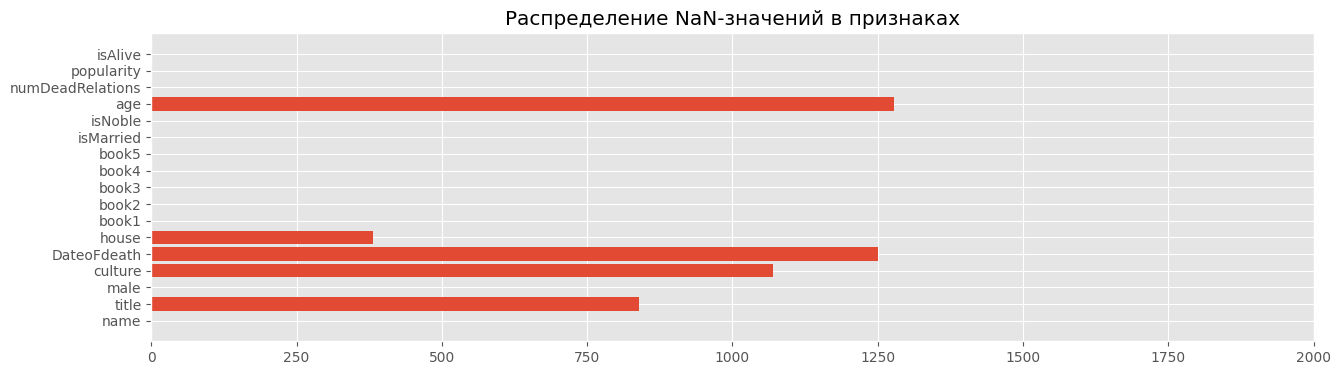

In [781]:
COLUMNS_NAN_ATTR = ['isAliveSpouse', 'isAliveHeir', 'isAliveFather', 'isAliveMother', 'spouse', 'heir', 'father', 'mother', 'dateOfBirth']

def drop_nan_attr(df: pd.DataFrame, inplace=True):
  """Убирает признаки, в которых большое количество NaN."""
  df.drop(columns=COLUMNS_NAN_ATTR, inplace=inplace)

drop_nan_attr(df)

plt.figure(figsize=(15, 4))
plt.title('Распределение NaN-значений в признаках')
plt.xlim(0, 2000)
plt.barh(df.columns, df.isna().sum())

In [782]:
HOUSE_MODE = df['house'].mode()[0]
CULTURE_MODE = df['culture'].mode()[0]
TITLE_MODE = df['title'].mode()[0]
AGE_MEAN = df['age'].loc[df.age > 0].mean()

def change_nan_attr(df: pd.DataFrame):
  """Заменяет значения NaN у признаков: house, culture, title, age."""
  df['house'].loc[df.house.isnull()] = HOUSE_MODE
  df['culture'].loc[df.culture.isnull()] = CULTURE_MODE
  df['title'].loc[df.title.isnull()] = TITLE_MODE
  df['age'].loc[(df.age.isna()) | (df.age < 0)] = AGE_MEAN

change_nan_attr(df)

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [783]:
POPULARITY_LIMIT = 0.5

def change_popular_attr(df: pd.DataFrame):
  """Заменяет признак popularity score на isPopular."""
  df['isPopular'] = df['popularity'].apply(lambda x: 0 if x < POPULARITY_LIMIT else 1)
  df.drop(columns=['popularity'], inplace=True)

change_popular_attr(df)

In [784]:
def change_dead_date_attr(df: pd.DataFrame):
  """Заменяет признак DateoFdeath на isDead."""
  df['isDead'] = df['DateoFdeath'].apply(lambda x: 0 if pd.isnull(x) else 1)
  df.drop(columns=['DateoFdeath'], inplace=True)

change_dead_date_attr(df)

In [785]:
def change_dead_relation_attr(df: pd.DataFrame):
  """Заменяет признак numDeadRelations на boolDeadRelations."""
  df['boolDeadRelations'] = df['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)
  df.drop(columns=['numDeadRelations'], inplace=True)

change_dead_relation_attr(df)

In [786]:
CULT_SIMILAR = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen', 'northern mountain clans'],
    'Free Folk': ['wildlings', 'wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
    'Ironborn': ['ironmen', 'ironborn',],
    'Valyrian': ['valyrian', 'valemen', 'vale mountain clans', 'vale'],
    'Rivermen': ['rivermen', 'riverlands']
}

def search_similar_cult(cult: str) -> str:
  """Ищет синоним и приводит к стандартному слову."""
  cult = cult.lower()

  for standart_name, similar_names in CULT_SIMILAR.items():
    if cult in similar_names:
      return standart_name

  return cult

def replace_similar_cult(df: pd.DataFrame):
  """Приводит все похожие слова culture в одно."""
  df['culture'] = df['culture'].apply(search_similar_cult)

replace_similar_cult(df)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [787]:
COLUMN_UNNECESSARY = ['name']

def drop_unnecessary_attr(df: pd.DataFrame):
  """Убирает ненужные признаки."""
  df.drop(columns=COLUMN_UNNECESSARY, inplace = True)

drop_unnecessary_attr(df)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

(array([ 345.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1212.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

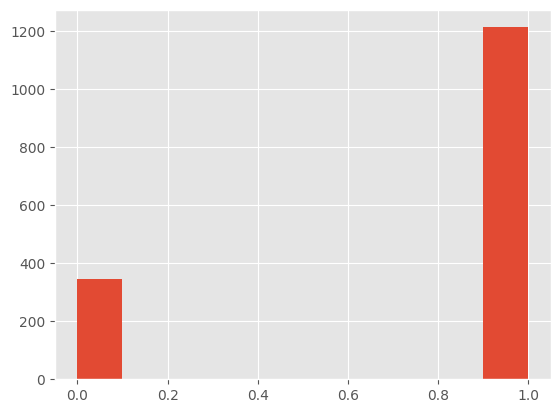

In [788]:
plt.hist(df['isAlive'])

**Мысли автора**

Признак - категоривальный, несбалансированный. Но с этим конечно ничего делать не будем )))

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

Text(0.5, 1.0, 'Зависимость isAlive = f(title)')

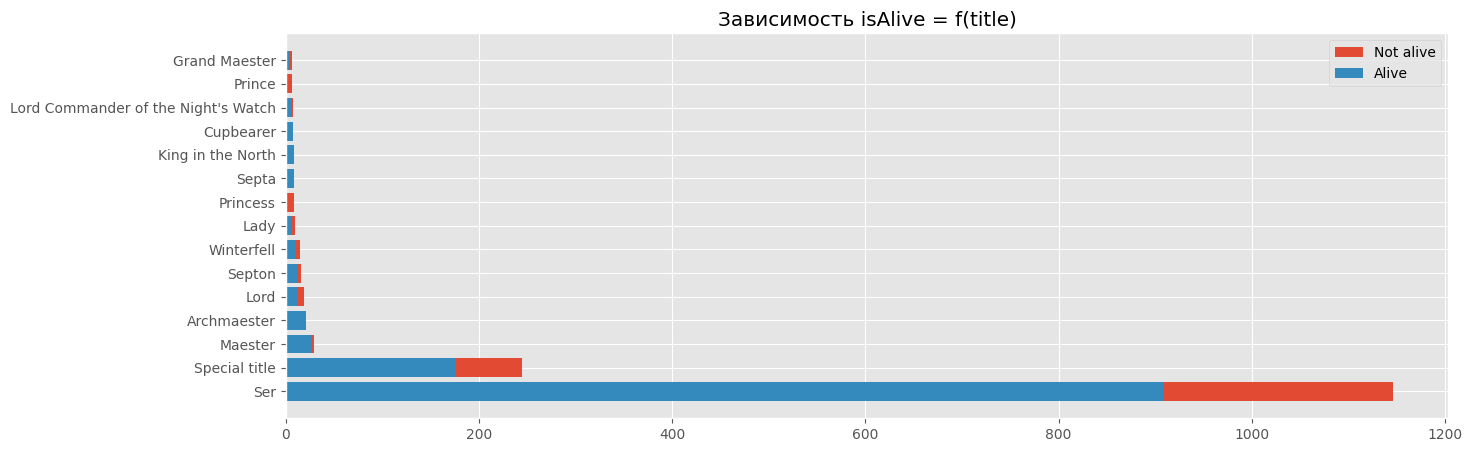

In [789]:
MIN_COUNT_VAL = 5
COLUMNS_OF_CATEGORIES = ['title', 'culture', 'house']

def replace_rare_categories(df: pd.DataFrame):
  """Замена редко-встречающихся категориальных признаков на Special признак."""

  for column in COLUMNS_OF_CATEGORIES:
    column_counts = df[column].value_counts()
    special_column = column_counts.loc[column_counts.values <= MIN_COUNT_VAL].index
    df[column] = df[column].replace(special_column, f'Special {column}')

replace_rare_categories(df)

# График зависимость isAlive = f(title)
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)
sum_alive_by_title = df.groupby(['title']).sum()
ax.barh(df['title'].value_counts().index, df['title'].value_counts().values, label='Not alive')
ax.barh(sum_alive_by_title.index, sum_alive_by_title['isAlive'].values, label='Alive')
ax.legend()
ax.set_title('Зависимость isAlive = f(title)')

In [790]:
# Перевод всех категоривальных признаков в числовые значения
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoding = LabelEncoder()
one_hot_encoding = OneHotEncoder()
columns_of_string = ['title', 'culture', 'house']

def transfer_category_in_numb(df: pd.DataFrame):
  for column in columns_of_string:
    df[column] = label_encoding.fit_transform(df[column])


transfer_category_in_numb(df)
df.head()

,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,isPopular,isDead,boolDeadRelations
S.No,,,,,,,,,,,,,,,,
1,12,1,5,14,0,0,0,0,0,0,0,35.545126,0,1,0,1
2,13,1,8,14,1,1,1,1,1,1,1,97.000000,1,1,0,1
3,12,1,5,27,0,0,0,1,0,0,1,35.545126,1,0,0,0
4,13,0,5,1,0,0,0,0,0,1,1,23.000000,0,0,1,0
5,13,0,1,39,0,0,0,1,0,1,1,29.000000,1,0,0,0


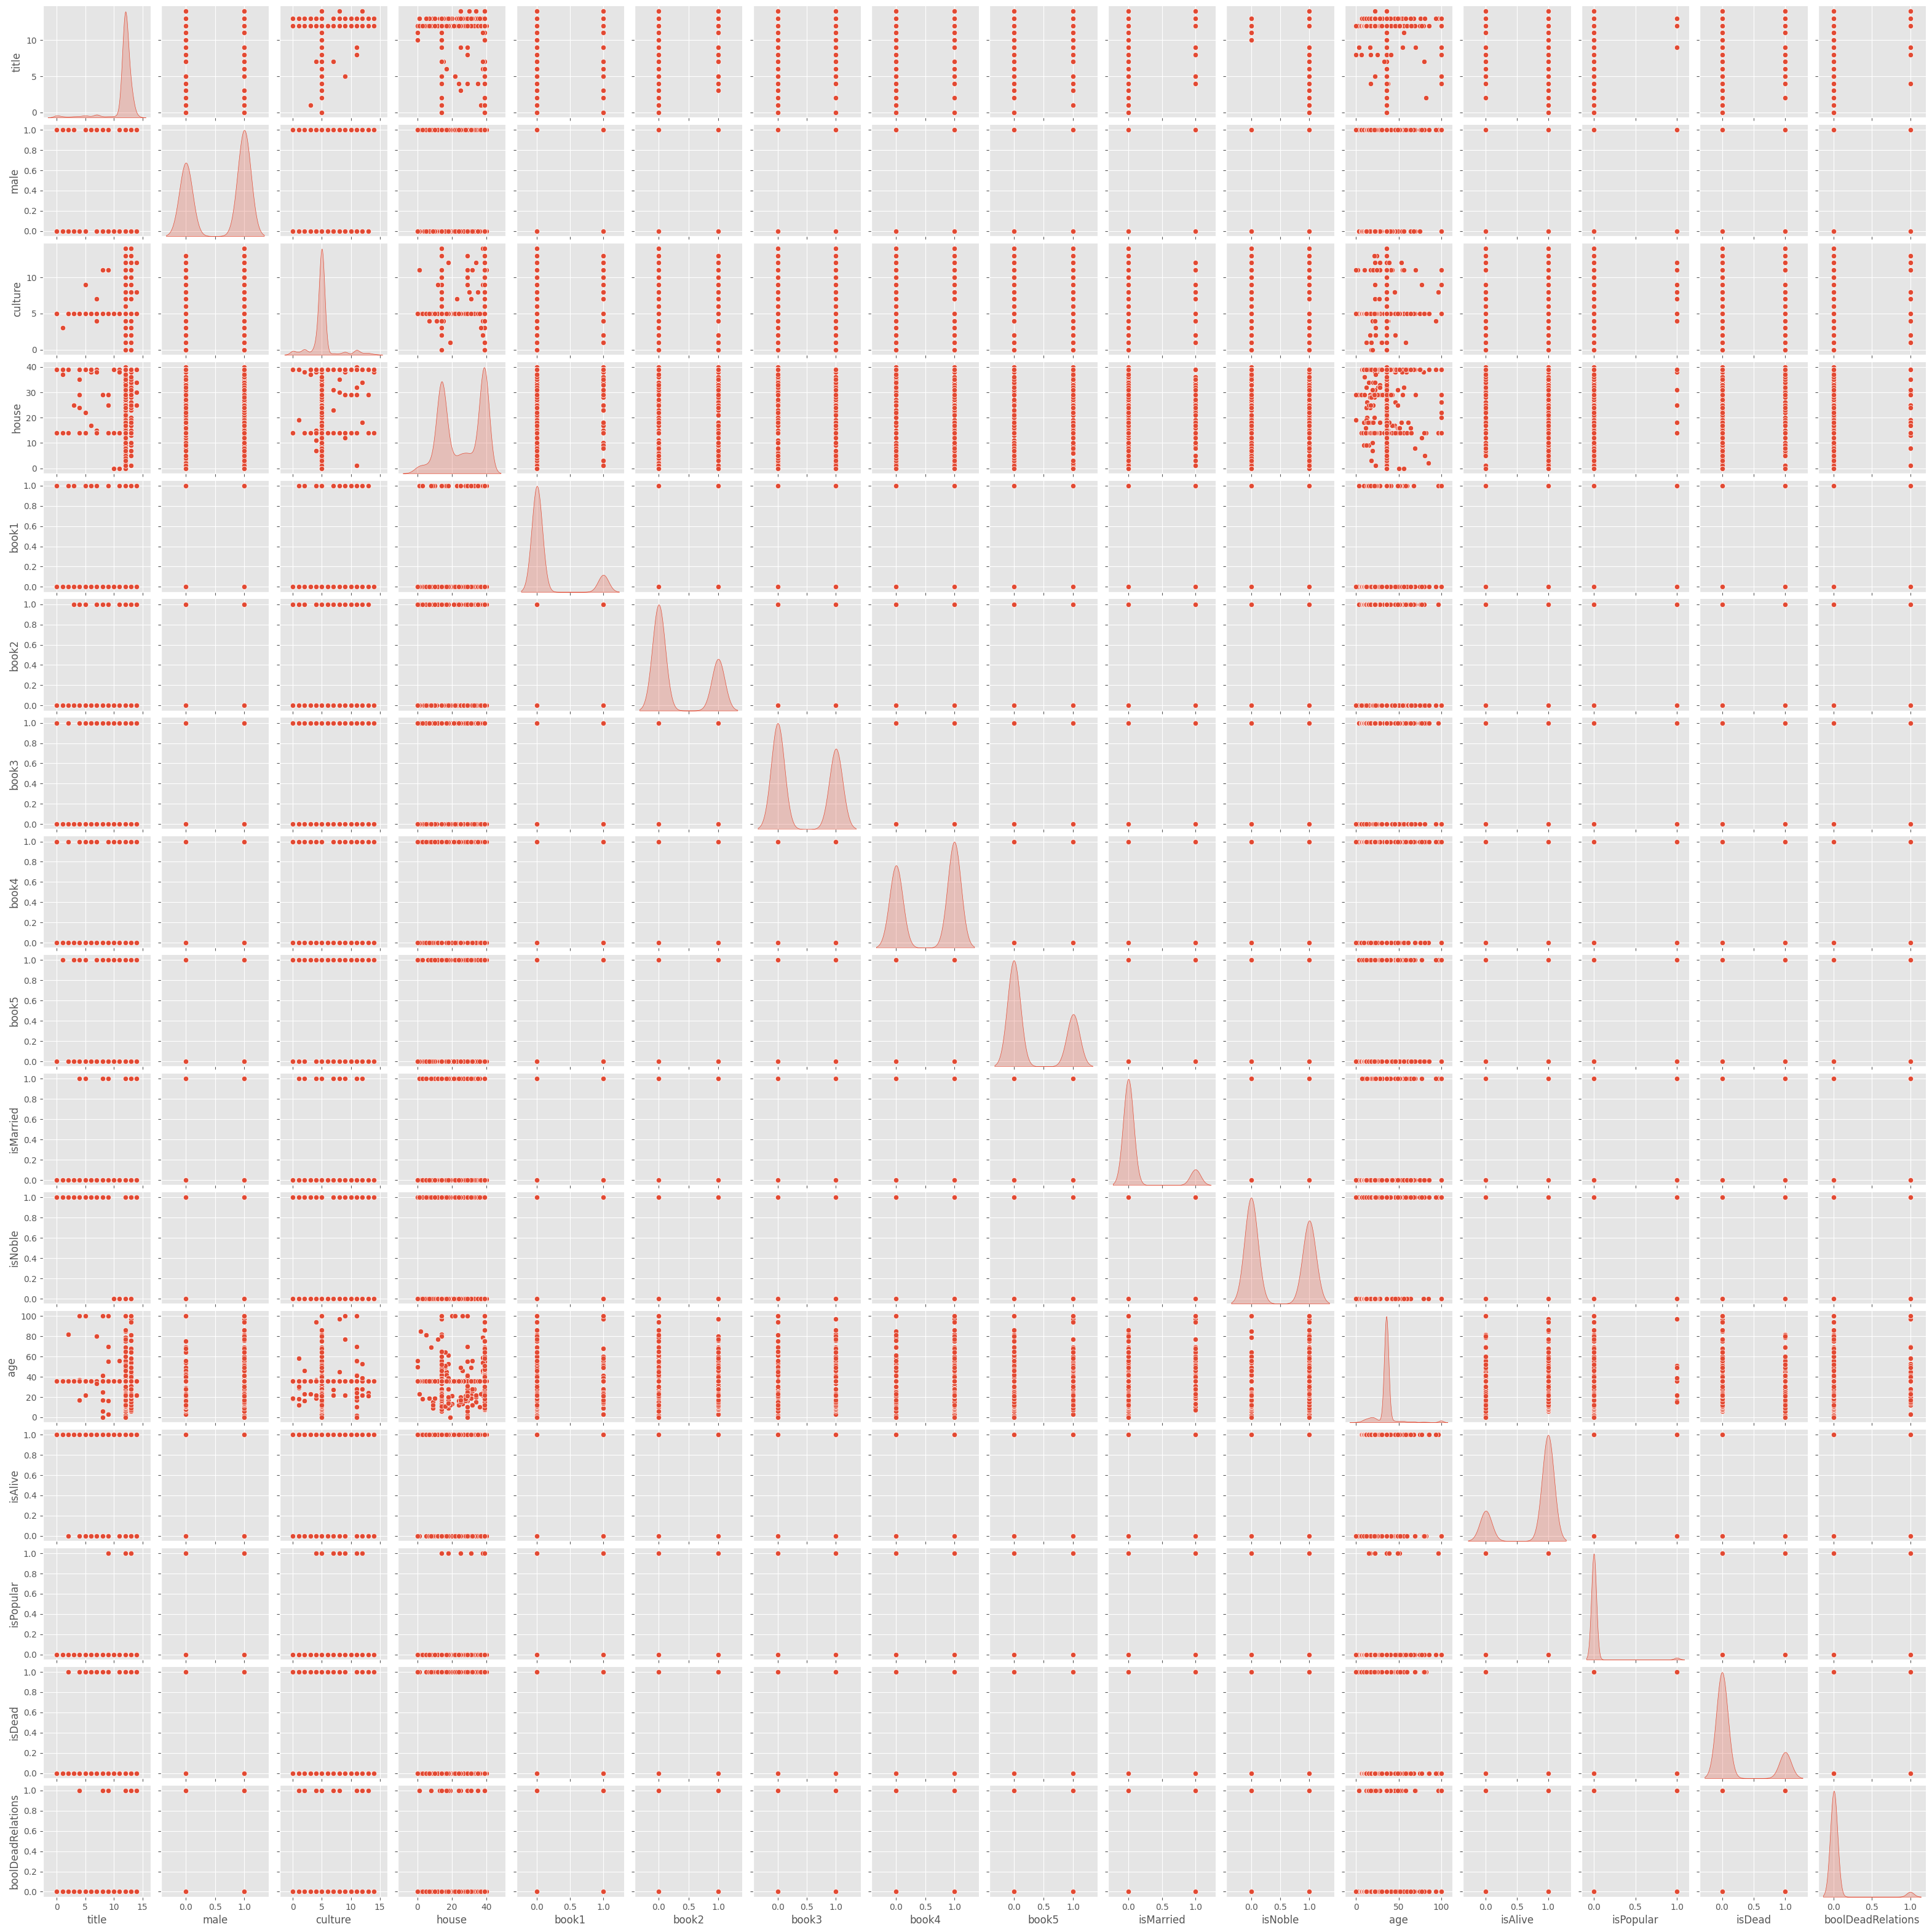

In [791]:
# Определяем корреляцию м/у данными
sns.pairplot(df, height = 2, kind ='scatter', diag_kind='kde')
plt.show()

<BarContainer object of 15 artists>

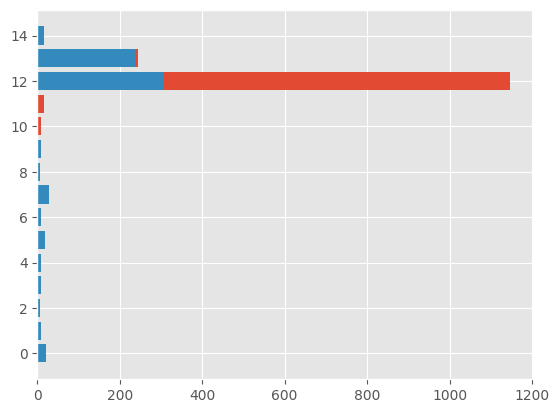

In [792]:
sum_noble_by_title = df.groupby(['title']).sum()['isNoble']
plt.barh(df['title'].value_counts().index, df['title'].value_counts().values, label='Not noble')
plt.barh(sum_noble_by_title.index, sum_noble_by_title.values, label='Is noble')

**Мысли автора**

Так как в самом частом значении намешены NaN признаки, то, имея это ввиду, можно сказать, что признаки title и isNoble прямо корряляцируют. Исключим title

In [793]:
COLUMN_CORRELATION = ['title']

def drop_correlation_attr(df: pd.DataFrame):
  """Убирает коррелирующие между собой признаки."""
  df.drop(columns=COLUMN_CORRELATION, inplace=True)

drop_correlation_attr(df)

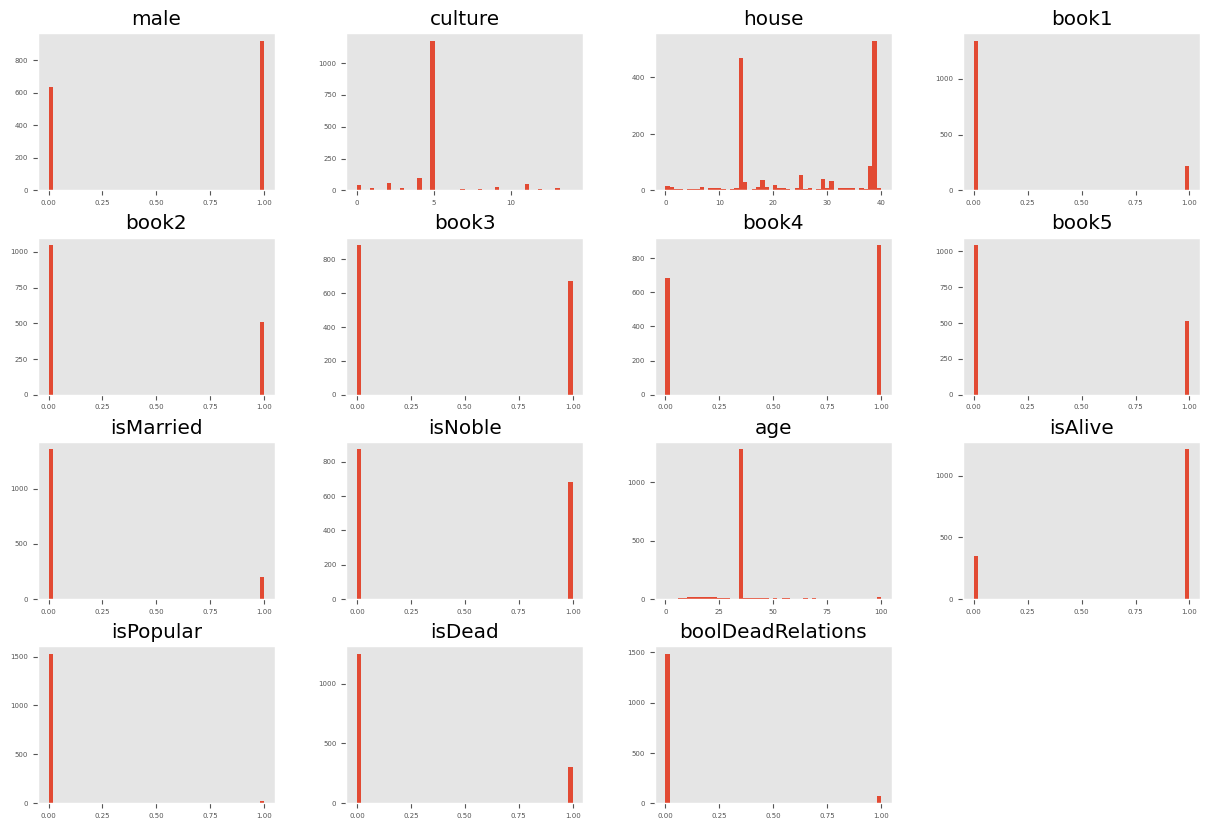

In [794]:
df.hist(figsize=(15, 10), bins=50,xlabelsize=5, ylabelsize=5, grid=False);

<Axes: >

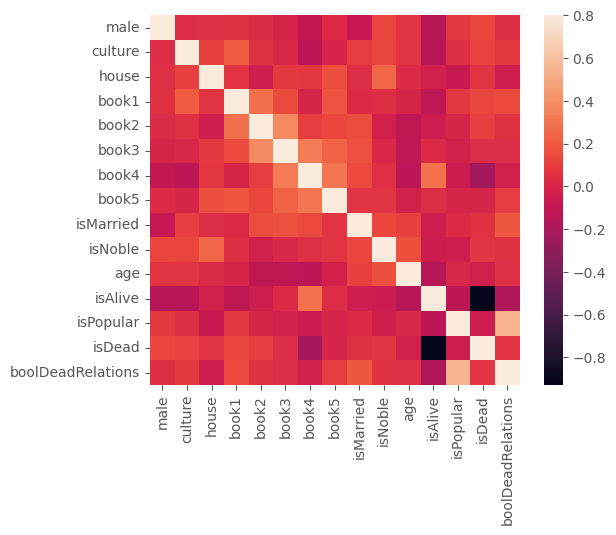

In [795]:
corrmat = df.corr()
sns.heatmap(corrmat, vmax=.8, square=True)

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

Text(0.5, 0.9, 'Женат')

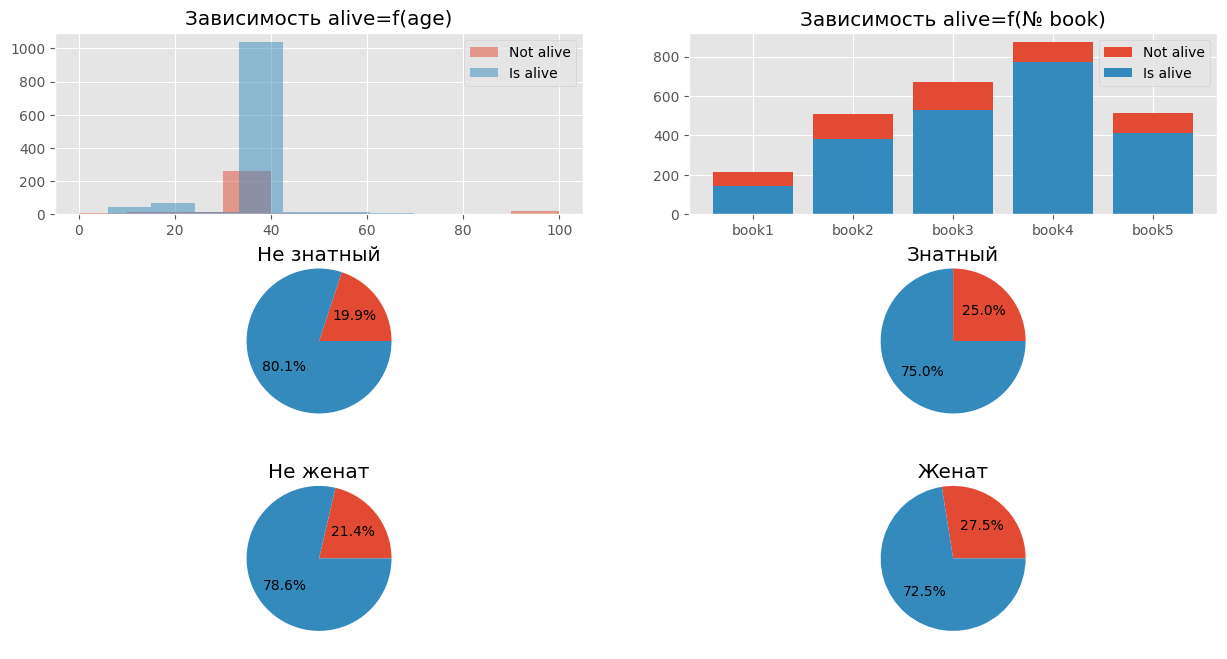

In [796]:
fig, axs = plt.subplots(3, 2)
fig.set_figwidth(15)
fig.set_figheight(8)

axs[0,0].hist(df['age'][df['isAlive'] == 0], alpha=0.5, label='Not alive')
axs[0,0].hist(df['age'][df['isAlive'] == 1], alpha=0.5, label='Is alive')
axs[0,0].set_title('Зависимость alive=f(age)')
axs[0,0].legend()

books_alive = []
books_not_alive = []
book_columns = ['book1','book2','book3','book4','book5']
for book in book_columns:
  count_alive = df[book].loc[(df['isAlive'] == 1) & df[book]].count()
  books_alive.append(count_alive)
  books_not_alive.append(count_alive + df[book].loc[(df['isAlive'] != 1) & df[book]].count())

axs[0,1].bar(book_columns, books_not_alive, label='Not alive')
axs[0,1].bar(book_columns, books_alive, label='Is alive')
axs[0,1].set_title('Зависимость alive=f(№ book)')
axs[0,1].legend()

get_data = lambda name, flag: [df[name].loc[(df[name]==flag)&(df['isAlive']==0)].count(), df[name].loc[(df[name]==flag)&(df['isAlive']==1)].count()]
axs[1,0].pie(get_data('isNoble', 0), autopct='%1.1f%%')
axs[1,0].set_title('Не знатный', y=0.9)

axs[1,1].pie(get_data('isNoble', 1), autopct='%1.1f%%')
axs[1,1].set_title('Знатный', y=0.9)

axs[2,0].pie(get_data('isMarried', 0), autopct='%1.1f%%')
axs[2,0].set_title('Не женат', y=0.9)

axs[2,1].pie(get_data('isMarried', 1), autopct='%1.1f%%')
axs[2,1].set_title('Женат', y=0.9)

**Мысли автора**

Если смотреть на круговые диаграммы, то признак isMarried особо не влияет на выживаемость персонажа. Так же на графике age видно, что все значения распределены в одной области, что не особо показательно. Но мы их оставим)

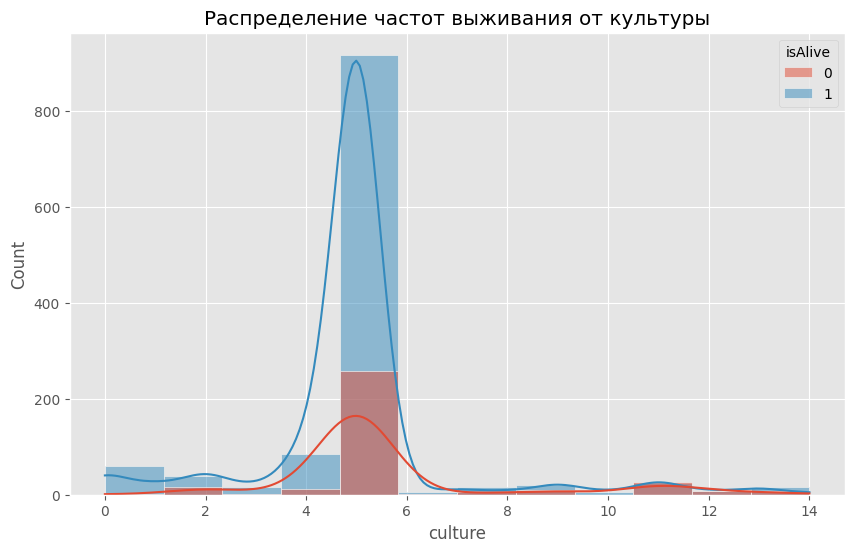

In [797]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='culture', kde=True, hue='isAlive')
plt.title('Распределение частот выживания от культуры')
plt.show()

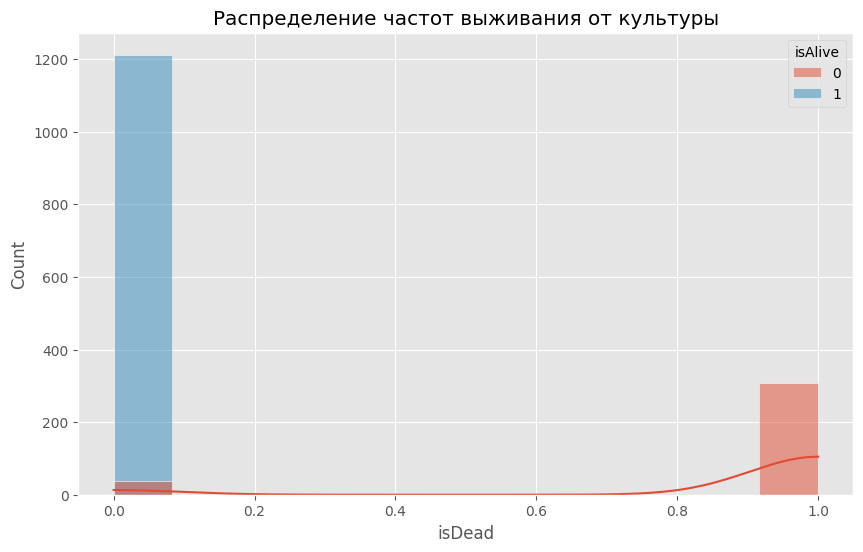

In [798]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='isDead', kde=True, hue='isAlive')
plt.title('Распределение частот выживания от культуры')
plt.show()

**Мысли автора**

Ну тут при isDead == 1 прямая корряляция в таргетом. Its very good?

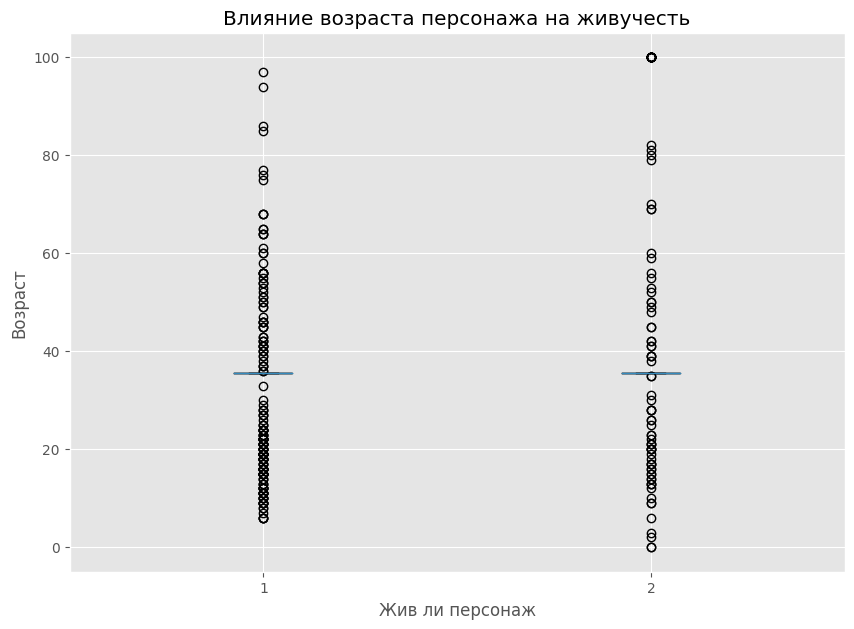

In [799]:
plt.figure(figsize=(10, 7))
plt.boxplot([df['age'].loc[df.isAlive==1], df['age'].loc[df.isAlive==0]])

plt.title('Влияние возраста персонажа на живучесть')
plt.xlabel('Жив ли персонаж')
plt.ylabel('Возраст')

plt.show()

**Мысли автора**

Не понятненько....

In [800]:
def preparation_data(df: pd.DataFrame):
  """Подготовка данных для модели."""
  drop_nan_attr(df)
  change_nan_attr(df)
  change_popular_attr(df)
  change_dead_date_attr(df)
  change_dead_relation_attr(df)
  replace_similar_cult(df)
  drop_unnecessary_attr(df)
  replace_rare_categories(df)
  transfer_category_in_numb(df)
  drop_correlation_attr(df)

preparation_data(df_test)

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [824]:
X = df.drop(columns=['isAlive']).values
y = df['isAlive'].values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [825]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [826]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [827]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [828]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1, max_iter=300)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=300)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [829]:
# Шаг 1. создание модели
models = {
    'forest': RandomForestClassifier(),
    'ada': AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0),
    'gaussian_process': GaussianProcessClassifier(),
    'gaussian_nb': GaussianNB(),
    'knn': KNeighborsClassifier(),
    'tree': DecisionTreeClassifier(),
    'svc': SVC(),
}

# Шаг 2. обучение модели
for model in models.values():
  model.fit(X_train, y_train)

## Часть 3. Оцените качество моделей

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [807]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [830]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)
models['linear'] = logistic_regression

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_linear = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy_linear)

Accuracy : 0.9712


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [831]:
# Шаг 3. Предсказание на тестовых данных и оценка по метрике accuracy
accuracy_models = { 'linear': accuracy_linear }
best_model = 'linear'

print('№. Models: accuracy')
for i, (name, model) in enumerate(models.items()):
  y_pred_model = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred_model)
  accuracy_models[name] = accuracy

  if accuracy > accuracy_models[best_model]:
    best_model = name

  print(f'{i}. {name.title()}: {"%.4f" % accuracy}')

print(f'{i+1}. Linear: {"%.4f" % accuracy_linear}\n')
print(f'Best model - {best_model.title()}: {"%.4f" % accuracy_models[best_model]}')

№. Models: accuracy
0. Forest: 0.9968
1. Ada: 0.9968
2. Gaussian_Process: 0.9199
3. Gaussian_Nb: 0.9712
4. Knn: 0.8942
5. Tree: 0.9968
6. Svc: 0.7724
7. Linear: 0.9712
8. Linear: 0.9712

Best model - Forest: 0.9968


In [833]:
X_test_final = df_test.values
y_pred_final = models[best_model].predict(X_test_final)

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [822]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 8.72MB/s]


In [836]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')
submission['isAlive'] = y_pred_final
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,0
...,...
1942,0
1943,0
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [837]:
submission.to_csv("/content/submission.csv")